In [28]:
!pip install download

# **Moving Average**

Can be use as feature in ML. core assumption is time series is stationary and slow varying mean. If it have lots of fluctuations then MA is not proper tool for forecasting. If it have constant mean, it have the usefulness. We will always take non stationary data. But it doesnt give any advantage on the latest data so sometimes the prediction may get so dull.

In [29]:
from __future__ import absolute_import, division, print_function, unicode_literals
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
from download import download
import plotly.express as px

In [6]:
# raw URL of the CSV file on GitHub
url = "https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/electricity_consumption.csv"
data = pd.read_csv(url, parse_dates=['Bill_Date'])
data

,Bill_Date,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
0,2016-01-01,365,1423.5,219.00,247.73,31
1,2016-02-01,292,1138.8,175.20,234.11,31
2,2016-03-01,130,507.0,78.00,123.85,29
3,2016-04-01,117,456.3,70.20,111.22,29
4,2016-05-01,136,530.4,81.60,118.37,29
5,2016-06-01,63,245.7,37.80,77.81,32
6,2016-07-01,110,429.0,66.00,86.67,30
7,2016-08-01,176,686.4,105.60,122.40,29
8,2016-09-01,357,1392.3,214.20,223.62,33
9,2016-10-01,235,916.5,141.00,152.54,29


In [10]:
print("Rows: ", data.shape[0])
print("Columns: ", data.shape[1])
print("\nFeatures: ", data.columns.tolist())
print("\nMissing Values: ", data.isnull().sum())
print("\nMissing Values: ", data.nunique())

Rows:  53
Columns:  6

Features:  ['Bill_Date', 'On_peak', 'Off_peak', 'Usage_charge', 'Billed_amount', 'Billing_days']

Missing Values:  Bill_Date        0
On_peak          0
Off_peak         0
Usage_charge     0
Billed_amount    0
Billing_days     0
dtype: int64

Missing Values:  Bill_Date        53
On_peak          51
Off_peak         53
Usage_charge     53
Billed_amount    52
Billing_days      9
dtype: int64


In [11]:
bill_df = data.set_index('Bill_Date')

In [12]:
bill_df

,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
Bill_Date,,,,,
2016-01-01,365,1423.5,219.00,247.73,31
2016-02-01,292,1138.8,175.20,234.11,31
2016-03-01,130,507.0,78.00,123.85,29
2016-04-01,117,456.3,70.20,111.22,29
2016-05-01,136,530.4,81.60,118.37,29
2016-06-01,63,245.7,37.80,77.81,32
2016-07-01,110,429.0,66.00,86.67,30
2016-08-01,176,686.4,105.60,122.40,29
2016-09-01,357,1392.3,214.20,223.62,33


In [14]:
bill_2018 = bill_df['2016':'2018'][['Billed_amount']]
bill_2018

,Billed_amount
Bill_Date,
2016-01-01,247.73
2016-02-01,234.11
2016-03-01,123.85
2016-04-01,111.22
2016-05-01,118.37
2016-06-01,77.81
2016-07-01,86.67
2016-08-01,122.40
2016-09-01,223.62


In [15]:
bill_2018['Billed_amount'].rolling(window=3).mean()

Bill_Date
2016-01-01           NaN
2016-02-01           NaN
2016-03-01    201.896667
2016-04-01    156.393333
2016-05-01    117.813333
2016-06-01    102.466667
2016-07-01     94.283333
2016-08-01     95.626667
2016-09-01    144.230000
2016-10-01    166.186667
2016-11-01    175.566667
2016-12-01    182.483333
2017-01-01    219.516667
2017-02-01    240.776667
2017-03-01    209.833333
2017-04-01    161.550000
2017-05-01    141.170000
2017-06-01    161.350000
2017-07-01    215.483333
2017-08-01    243.746667
2017-09-01    267.820000
2017-10-01    231.653333
2017-11-01    189.500000
2017-12-01    145.206667
2018-01-01    176.750000
2018-02-01    206.696667
2018-03-01    223.860000
2018-04-01    185.040000
2018-05-01    172.280000
2018-06-01    177.896667
2018-07-01    222.270000
2018-08-01    264.630000
2018-09-01    277.363333
2018-10-01    291.766667
2018-11-01    259.546667
2018-12-01    224.340000
Name: Billed_amount, dtype: float64

In [17]:
bill_2018['ma_rolling_3']=bill_2018['Billed_amount'].rolling(window=3).mean().shift(1)


Bill_Date
2016-01-01           NaN
2016-02-01           NaN
2016-03-01           NaN
2016-04-01    201.896667
2016-05-01    156.393333
2016-06-01    117.813333
2016-07-01    102.466667
2016-08-01     94.283333
2016-09-01     95.626667
2016-10-01    144.230000
2016-11-01    166.186667
2016-12-01    175.566667
2017-01-01    182.483333
2017-02-01    219.516667
2017-03-01    240.776667
2017-04-01    209.833333
2017-05-01    161.550000
2017-06-01    141.170000
2017-07-01    161.350000
2017-08-01    215.483333
2017-09-01    243.746667
2017-10-01    267.820000
2017-11-01    231.653333
2017-12-01    189.500000
2018-01-01    145.206667
2018-02-01    176.750000
2018-03-01    206.696667
2018-04-01    223.860000
2018-05-01    185.040000
2018-06-01    172.280000
2018-07-01    177.896667
2018-08-01    222.270000
2018-09-01    264.630000
2018-10-01    277.363333
2018-11-01    291.766667
2018-12-01    259.546667
Name: ma_rolling_3, dtype: float64

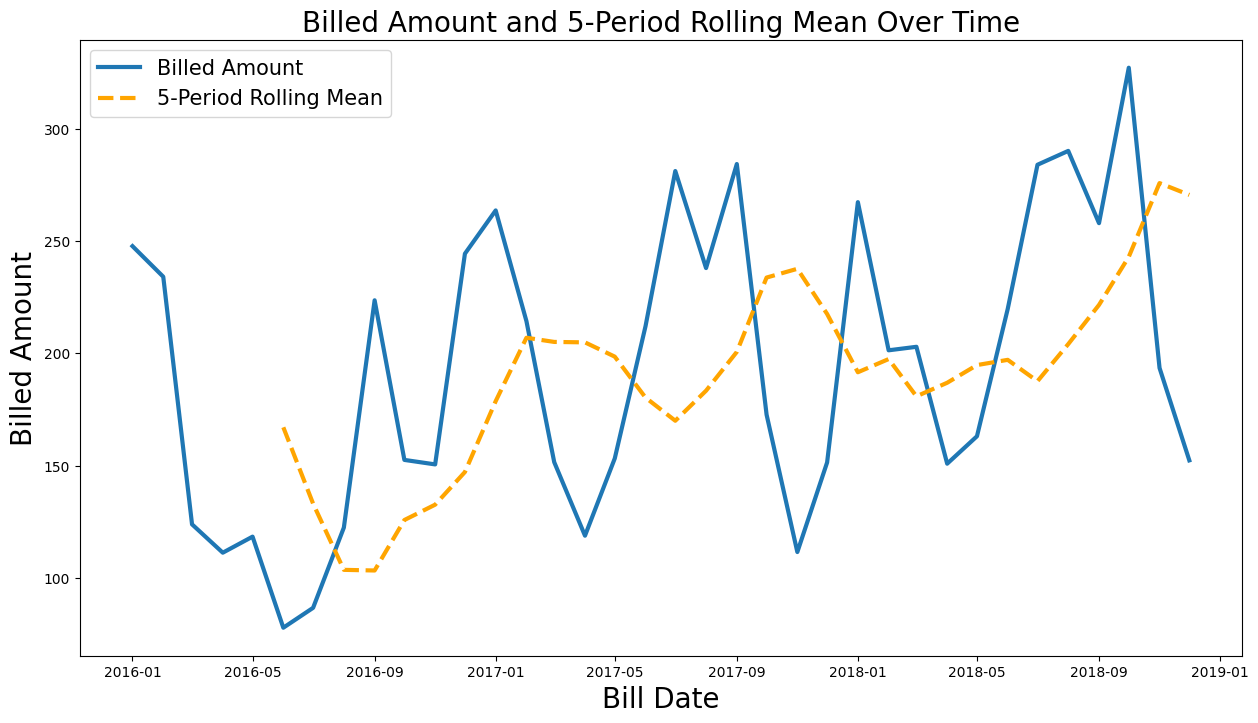

In [19]:
bill_2018['ma_rolling_5'] = bill_2018['Billed_amount'].rolling(window=5).mean().shift(1)

plt.figure(figsize=(15, 8))
plt.plot(bill_2018.index, bill_2018['Billed_amount'], label='Billed Amount', linewidth=3)
plt.plot(bill_2018.index, bill_2018['ma_rolling_5'], label='5-Period Rolling Mean', linestyle='--', color='orange', linewidth=3)

plt.xlabel('Bill Date', fontsize=20)
plt.ylabel('Billed Amount', fontsize=20)
plt.title('Billed Amount and 5-Period Rolling Mean Over Time', fontsize=20)
plt.legend(fontsize=15)

plt.show()

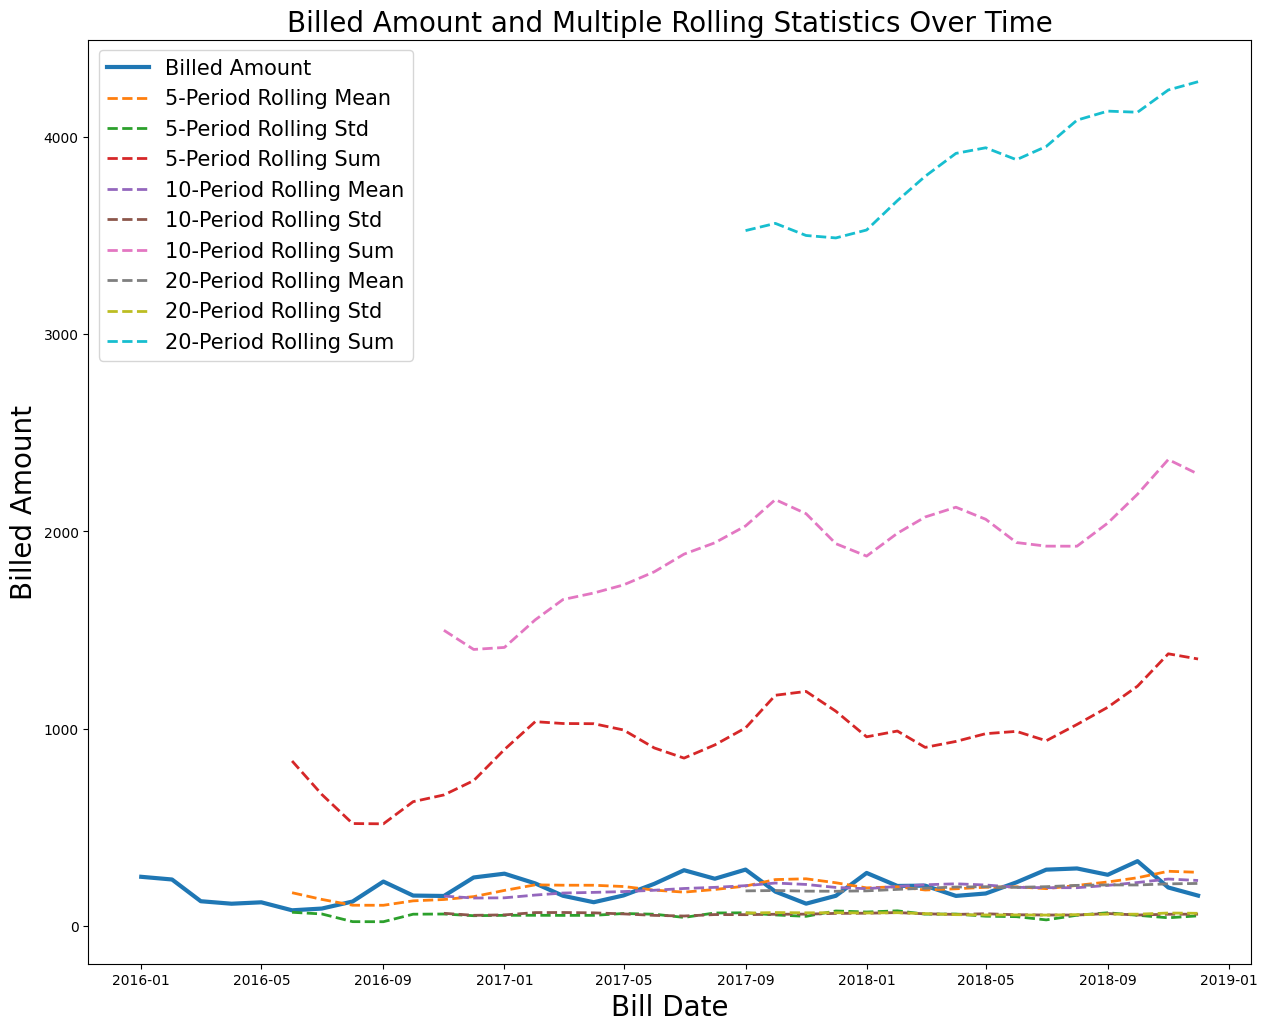

In [20]:
# Rolling statistics with different window sizes
window_sizes = [5, 10, 20]

for window_size in window_sizes:
    bill_2018[f'ma_rolling_{window_size}'] = bill_2018['Billed_amount'].rolling(window=window_size).mean().shift(1)
    bill_2018[f'std_rolling_{window_size}'] = bill_2018['Billed_amount'].rolling(window=window_size).std().shift(1)
    bill_2018[f'sum_rolling_{window_size}'] = bill_2018['Billed_amount'].rolling(window=window_size).sum().shift(1)

# Original 'Billed_amount' and the rolling statistics
plt.figure(figsize=(15, 12))
plt.plot(bill_2018.index, bill_2018['Billed_amount'], label='Billed Amount', linewidth=3)

for window_size in window_sizes:
    plt.plot(bill_2018.index, bill_2018[f'ma_rolling_{window_size}'], label=f'{window_size}-Period Rolling Mean', linestyle='--', linewidth=2)
    plt.plot(bill_2018.index, bill_2018[f'std_rolling_{window_size}'], label=f'{window_size}-Period Rolling Std', linestyle='--', linewidth=2)
    plt.plot(bill_2018.index, bill_2018[f'sum_rolling_{window_size}'], label=f'{window_size}-Period Rolling Sum', linestyle='--', linewidth=2)

plt.xlabel('Bill Date', fontsize=20)
plt.ylabel('Billed Amount', fontsize=20)
plt.title('Billed Amount and Multiple Rolling Statistics Over Time', fontsize=20)
plt.legend(fontsize=15)

plt.show()

# **Weighted Moving Average**

**Weighted Moving Average** = (t* weight factor) + ((t+1)*weightfactor-1) + ((t-n)* weighted factor-n)/n

In [21]:
# Efficient and Optimized Algorithm Version

def weighted_moving_average(data, weights):
    """
    Calculate the weighted moving average.

    Parameters:
    - data: 1-D array or pandas Series
    - weights: 1-D array of weights, must be the same length as data

    Returns:
    - wma: 1-D array of weighted moving averages
    """
    data = np.asarray(data)
    weights = np.asarray(weights)

    if len(data) != len(weights):
        raise ValueError("Lengths of data and weights must be the same.")

    wma = np.convolve(data, weights, mode='valid') / weights.sum()

    return wma




  # Non Optimized Version

def wma(weights):
  def calc(x):
    return (weights*x).mean()
  return calc


In [24]:
weights = np.array([0.5, 1, 1.5])
bill_2018['wma'] = bill_2018['Billed_amount'].rolling(window=3).apply(lambda x: weighted_moving_average(x, weights), raw=True)

<Axes: xlabel='Bill_Date'>

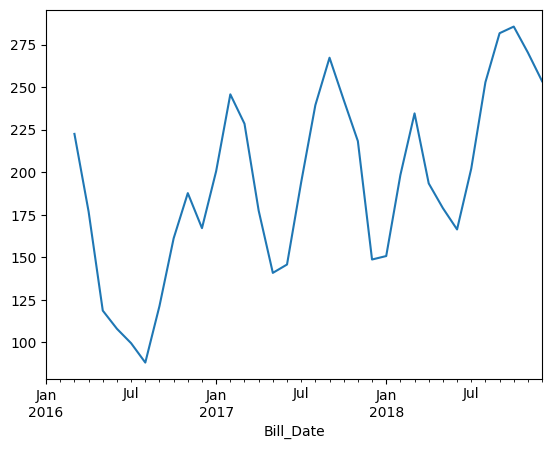

In [26]:
bill_2018['wma'].plot()

In [33]:
# Calculating moving averages with different window sizes and use shift(1)
bill_2018['wma_3_days'] = bill_2018['Billed_amount'].rolling(window=3).mean().shift(1)
bill_2018['wma_10_days'] = bill_2018['Billed_amount'].rolling(window=10).mean().shift(1)
bill_2018['wma_15_days'] = bill_2018['Billed_amount'].rolling(window=15).mean().shift(1)
bill_2018['wma_20_days'] = bill_2018['Billed_amount'].rolling(window=20).mean().shift(1)
bill_2018['wma_30_days'] = bill_2018['Billed_amount'].rolling(window=30).mean().shift(1)

# interactive plot using Plotly with advanced layout customization
fig = px.line(bill_2018, x=bill_2018.index,
              y=['Billed_amount', 'wma_3_days', 'wma_10_days', 'wma_15_days', 'wma_20_days', 'wma_30_days'],
              labels={'value': 'Amount', 'variable': 'Metric'},
              title='Billed Amount with Weighted Moving Averages',
              template='plotly_dark')

# Advanced layout customization
fig.update_layout(xaxis_title='Bill Date',
                  yaxis_title='Billed Amount',
                  legend_title='Metric',
                  xaxis_rangeslider_visible=True,
                  legend=dict(x=0, y=1, traceorder='normal'),
                  title_font=dict(size=24, family='Arial', color='darkgray'),
                  legend_font=dict(size=14, family='Arial', color='darkgray'),
                  xaxis=dict(showgrid=True, gridwidth=0.5, gridcolor='gray'),
                  yaxis=dict(showgrid=True, gridwidth=0.5, gridcolor='gray'))

fig.update_xaxes(
    title='Bill Date',
    showline=True,
    showgrid=True,
    showticklabels=True,
    linecolor='darkgray',
    linewidth=2,
    ticks='outside',
    tickangle=-45,
    tickcolor='darkgray',
    tickfont=dict(size=12),
    ticklen=10,
    tickwidth=2,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label='1d', step='day', stepmode='backward'),
            dict(count=7, label='1w', step='day', stepmode='backward'),
            dict(count=1, label='1m', step='month', stepmode='backward'),
            dict(count=6, label='6m', step='month', stepmode='backward'),
            dict(count=1, label='1y', step='year', stepmode='backward'),
            dict(step='all')
        ])
    ),
    rangeslider=dict(visible=True)
)

# Range selector buttons for days, months, and years
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label='1d', step='day', stepmode='backward'),
            dict(count=7, label='7d', step='day', stepmode='backward'),
            dict(count=1, label='1m', step='month', stepmode='backward'),
            dict(count=3, label='3m', step='month', stepmode='backward'),
            dict(count=6, label='6m', step='month', stepmode='backward'),
            dict(count=1, label='YTD', step='year', stepmode='todate'),
            dict(count=1, label='1y', step='year', stepmode='backward'),
            dict(count=3, label='3y', step='year', stepmode='backward'),
            dict(step='all')
        ])
    )
)

fig.show()

# Click the legends texts so that you can be able to switch on and off for a specific or more lines that you specifically want to see.

In [ ]:
bill_2018